In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score,fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline


import sklearn

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок


In [6]:
df_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
df_train.quality = np.where(df_train.quality < 7, 0, 1) # класс 1 - хорошие вина 7,8,9,10 категории

df_train = df_train.drop(columns = 'density')# в файле с поиском модели выяснилось, что столбец сильно коррелирует с другим
X_test = X_test.drop(columns = 'density')# в файле с поиском модели выяснилось, что столбец сильно коррелирует с другим

X_train = df_train.drop(columns = 'quality')
y_train = df_train.quality

In [7]:
# Блок(и) обучения и поверки модели


In [8]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                    ('classifier', KNeighborsClassifier(n_neighbors=106, p = 1, weights='distance'))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=106, p=1,
                                      weights='distance'))])

In [9]:
# Блок предсказания с использованием тестового набора

In [10]:
y_pred_proba = pipe.predict_proba(X_test)[:,1]
best_threshold = 0.7616942898478744

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = (y_pred_proba > best_threshold).astype(int)

In [11]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Массив выглядит подозрительно пустым, а метрики, помимо пресижн, в файле подбора моделей, подозрительно маленькими. Однако, если исходить из условия задачи, нам нужно "научиться покупать хорошие вина" - то есть мы не хотим скупить все хорошие вина(как делали бы это при максимизации recall), пропустив какие-то из них, ошибочно приняв за плохие. Мы просто хотим, чтобы те вина, которые мы купили, оказались точно хорошими. Итак, нам необходимо минимизировать "метанол" среди купленных вин(то есть минимизировать FP), зато максимизировать хорошие вина, опознанные как хорошие(TP).

#### таким образом, я ориентировалась на метрику precision - думаю, условие задачи требует этого

0.8823529411764706

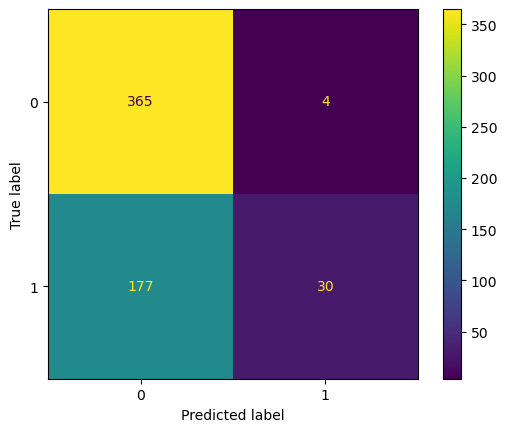

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)